In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the pretrained models
from transformers import MBart50TokenizerFast
tokenizer = MBart50TokenizerFast.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")

from transformers import AutoModelForCausalLM
model = AutoModelForCausalLM.from_pretrained("microsoft/git-base")
model.resize_token_embeddings(tokenizer.vocab_size) # change this because we used a different tokenizer than the pretrained one

2024-12-14 17:16:18.251692: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-14 17:16:20.080728: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734214580.884377    5247 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734214581.076172    5247 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-14 17:16:22.666209: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Embedding(250054, 768, padding_idx=0)

In [3]:
import os
import torch
# load the saved weights
model.load_state_dict(torch.load(os.path.join(os.getcwd(), 'final_model')).state_dict())

<All keys matched successfully>

In [4]:
from transformers import AutoImageProcessor
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
processor = AutoImageProcessor.from_pretrained("microsoft/git-base")

In [13]:
# get the test image data
from datasets import load_dataset
demo_data = load_dataset("imagefolder", data_dir = os.path.join(os.getcwd(), 'data/demo'), split="train") # doing train just so the data dont split
demo_data

Dataset({
    features: ['image'],
    num_rows: 1
})

天空是阴云的


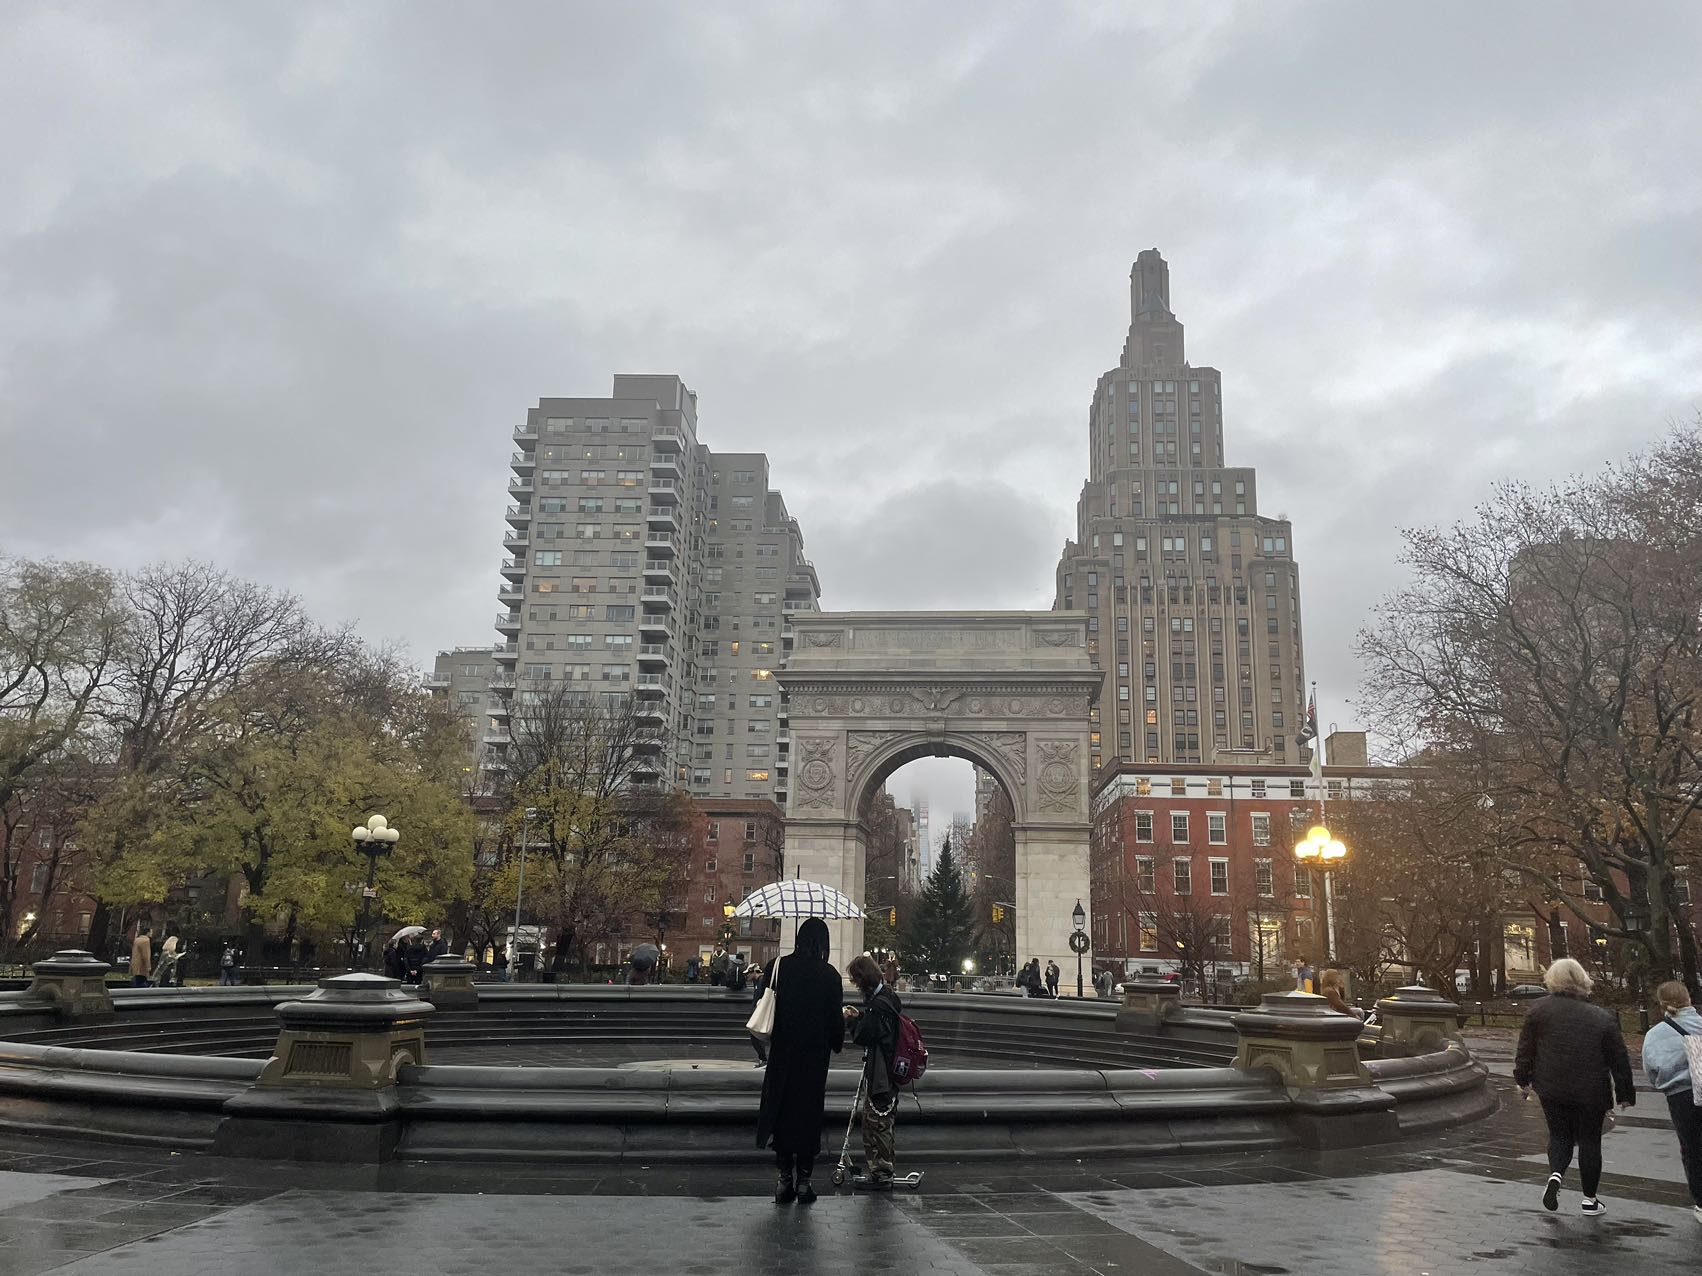

In [14]:
# this will generate the captions and display the image for a random image in the test dataset
processed_test_image = processor(images=demo_data['image'][0], return_tensors = 'pt')
generated_ids = model.generate(pixel_values=processed_test_image['pixel_values'].to(device), max_length = 10)
generated_caption = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)

print(generated_caption[0].replace("_ ", ""))
demo_data['image'][0]